In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Yashit/Downloads/Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


<Axes: >

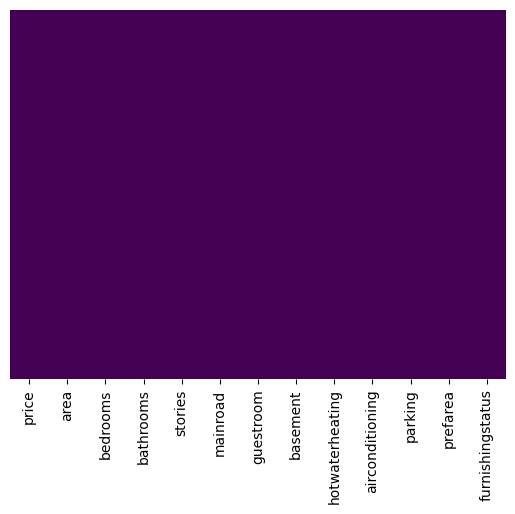

In [2]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [3]:
# List the 6 columns where you want to replace 'yes'/'no'
cols_to_convert = ["mainroad", "guestroom","basement", "hotwaterheating","airconditioning","prefarea"]  # Replace with actual column names

# Apply the replacement
df[cols_to_convert] = df[cols_to_convert].replace({'yes': 1, 'no': 0})

#apply replacement for furnished column
furnished_col_convert = ["furnishingstatus"]
df[furnished_col_convert]=df[furnished_col_convert].replace({'unfurnished':-1,'semi-furnished':0,'furnished':1})
df.head()

C:\Users\Yashit\AppData\Local\Temp\ipykernel_21352\1720347328.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_to_convert] = df[cols_to_convert].replace({'yes': 1, 'no': 0})
C:\Users\Yashit\AppData\Local\Temp\ipykernel_21352\1720347328.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[furnished_col_convert]=df[furnished_col_convert].replace({'unfurnished':-1,'semi-furnished':0,'furnished':1})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [4]:
#Split data into train-test sets.

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop("parking", axis=1)  # Replace with your target column name
y = df["parking"]

# Split the data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (436, 12) (436,)
Test shape: (109, 12) (109,)


In [5]:
#.Fit a Linear Regression model using sklearn.linear_model.

from sklearn.linear_model import LinearRegression

#  Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions
y_pred = model.predict(X_test)

In [6]:
#Fit a Linear Regression model using sklearn.linear_model.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.61
R² Score: 0.22


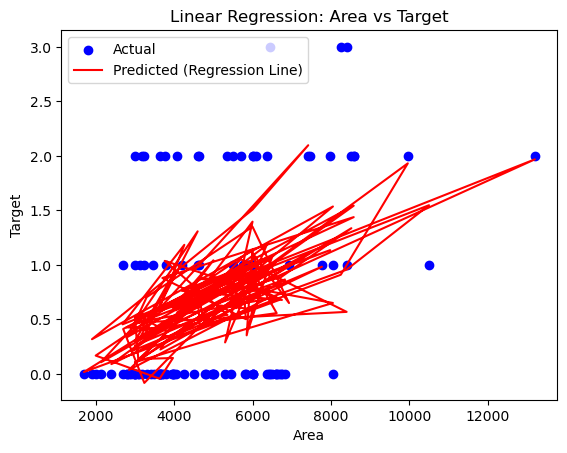

In [7]:
#Fit a Linear Regression model using sklearn.linear_model.

plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(X_test['area'], model.predict(X_test), color='red', label='Predicted (Regression Line)')

plt.xlabel("Area")
plt.ylabel("Target")  # Replace with your target name, like "Price"
plt.title("Linear Regression: Area vs Target")
plt.legend()
plt.show()

In [8]:
# View coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print(coefficients)

Intercept: -0.3760917731015022
             Feature   Coefficient
0              price  1.356367e-07
1               area  6.273301e-05
2           bedrooms  6.194711e-02
3          bathrooms  3.480801e-02
4            stories -1.458182e-01
5           mainroad  1.912095e-01
6          guestroom -1.655057e-01
7           basement -6.634570e-02
8    hotwaterheating  1.742349e-01
9    airconditioning  1.111687e-01
10          prefarea -6.685128e-02
11  furnishingstatus  8.922519e-02
